# Coffea Casa Analysis Template

## Table of Contents
- [Introduction](#Introduction)
- [Loading Files](#Loading-Files)
- [The Processor Class](#The-Processor-Class)
    - [Skeleton](#Skeleton)
    - [Specifications](#Specifications)
    - [Minimal Processor](#Minimal-Processor)
- [The Dask Executor](#The-Dask-Executor)
    - [Scheduler Setup](#Scheduler-Setup)
    - [Running the Analysis](#Running-the-Analysis)
- [Miscellaneous](#Miscellaneous)
    - [ServiceX](#ServiceX)

## Introduction
This is a template file to elucidate the structure of a typical analysis notebook on coffe-casa. We will load in sample data, create a minimal processor class, and run the Dask executor.

In [1]:
import coffea
import coffea.processor as processor
import hist

## Loading Files

A dataset is parsed as a dictionary where each key is a dataset name, and each value is a list of files in that dataset. You can have multiple datasets (multiple keys), and you can have multiple files in a dataset (multiple pointers in the list). Typically, CMS files will require authentication, but coffea-casa does away with this by implementation of tokens. In order to bypass authentication, replace the redirector portion of your file with xcache; i.e., the file:

`root://`**xrootd.unl.edu**`//eos/cms/store/mc/RunIIAutumn18NanoAODv7/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/260000/47DA174D-9F5A-F745-B2AA-B9F66CDADB1A.root`

becomes

`root://`**xcache**`//eos/cms/store/mc/RunIIAutumn18NanoAODv7/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21_ext2-v1/260000/47DA174D-9F5A-F745-B2AA-B9F66CDADB1A.root`

Below, we load in two datasets. The first has six files, and the second has four.

In [2]:
fileset = {'tHq': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/38E83594-51BD-7D46-B96D-620DD60078A7.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3A3BA22C-AA71-2544-810A-6DF4C6BA96FC.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/3AFB1F42-BC6D-D44E-86FD-DB93C83F88FF.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/A37B4B7A-FB5B-484D-8577-40B860D77D23.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/E3C7548E-EE40-BA45-9130-17DF56FBE537.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THQ_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/100000/F9EFC559-09E9-BB48-8150-9AA8B7F02C1C.root'],
            'tHW': ['root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2806293E-D1DD-4A49-A274-0CC3BA57BBDF.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/2F19962E-1DFB-A14A-91C2-30B69D5651D3.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/D9744111-ED04-3F47-A52A-C18424F01609.root',
                    'root://xcache//store/mc/RunIISummer16NanoAODv5/THW_Hincl_13TeV-madgraph-pythia8_TuneCUETP8M1/NANOAODSIM/PUMoriond17_Nano1June2019_102X_mcRun2_asymptotic_v7-v1/70000/E4CFA095-E7DB-B449-986D-1A5D21FD1D50.root']}

## The Processor Class

### Skeleton

In [3]:
class Processor(processor.ProcessorABC):
    def __init__(self):
        ''' Initialize histogram properties here. Define self.output as an accumulator dictionary of the final histograms. '''
        self.output = processor.dict_accumulator({})
    def process(self, events):
        ''' Define analysis details here. Fill the histograms in the dictionary, then return the accumulator. '''
        return self.output

    def postprocess(self, accumulator):
        ''' This step executes once the accumulator has received all chunks of data. Handle weights, scaling, rebinning here.'''
        return self.output

### Specifications
This part is pure [Coffea](https://coffeateam.github.io/coffea/reference.html). The processor class encapsulates all of our analysis. It is what we send to our executor, which forwards it to our workers. For detailed instructions on how to create the processor class, see the Coffea examples and documentation, or refer to the benchmarks and analysis in this repository. In short:

`__init__`: This is where we define our histograms, as per the [hist](https://hist.readthedocs.io/en/latest/) library. Categorical or sparse axes split data vertically, into different categories. Bin or dense axes split data horizontally, into the 'bars' of the histogram. Histograms are an accumulator, as are dictionaries of histograms. An accumulator is just any object that enables easy object addition; i.e., \[AwkwardArray1\] + \[AwkwardArray2\] = \[AwkwardArray1 + AwkwardArray2\]. They are the core of the coffea processor, as if you chunk up the data, the way in which you fill an accumulator with the chunks is irrelevant and you will always end up with the same result once all chunks have been processed. 

`process`: This is where all of the magic actually happens. All of your analysis code should go here. The current Coffea standard is to use NanoEvents for reading data. For a primer on columnar analysis, see the benchmarks and analysis in this repository, or the Coffea documentation's examples.

`postprocess`: This is where we can make post-analysis adjustments, such as rebinning or scaling our histograms.

### Minimal Processor
We'll just plot the MET of our sample datasets. MET is an event-level property, so our arrays are flat and not jagged, which makes things a little more simple.

In [4]:
class Processor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.axis.StrCategory(name="dataset", label="", categories=[], growth=True)
        # Split data into 50 bins, ranging from 0 to 100.
        MET_axis = hist.axis.Regular(name="MET", label="MET [GeV]", bins=50, start=0, stop=100)
        
        self.output = processor.dict_accumulator({
            'MET': hist.Hist(dataset_axis, MET_axis),
        })
    
    def process(self, events):
        dataset = events.metadata["dataset"]
        MET = events.MET.pt

        self.output['MET'].fill(dataset=dataset, MET=MET)
        return self.output

    def postprocess(self, accumulator):
        return accumulator

## The Dask Executor

### Scheduler Setup
This is where [Dask](https://dask.org/) comes in. Now that we have a minimal processor put together, we can execute it on our sample data. This requires an executor. Coffea comes with basic executors such as `futures_executor` and `iterative_executor` which use strictly Pythonic tools. The Dask executor (`dask_executor`), however, is more sophisticated for cluster computing, and coffea-casa enables its usage.

In the JupyterLab sidebar, you should see a sidecar dedicated to Dask:


<img src="docs/dask.png" alt="Drawing" width="35%"/>


You can click on the UNL HTCondor Cluster button and drag it out into a block of the Jupyter Notebook, and it will paste everything necessary to connect to the Dask scheduler. It should look something like this (of course, the IP will be different):


<img src="docs/daskclient.png" alt="Drawing" width="50%"/>


The Dask workers will then connect to this scheduler when the executor is run. You can also point to localhost:

In [6]:
from dask.distributed import Client

client = Client("tls://localhost:8786")

### Running the Analysis

Then, all we have to do is run the executor. This is done through the `processor.run_uproot_job` method. It requires the following to be provided as arguments:

`fileset`: The files we want to run our analysis on. In our case, the sample file defined earlier.

`treename`: This is the name of the tree inside of the root file. For NanoAODs, I believe this should always just be 'Events.'

`executor`: The executor that we wish to use; coffea-casa is intended to be used with the Dask executor. You can also try `futures_executor` and `iterative_executor`, and both can be useful for debugging or troubleshooting when workers are acting up with errors.

`executor_args`: There's a lot of optional arguments you can put in the dictionary here. See the run_uproot_job [documentation](https://coffeateam.github.io/coffea/api/coffea.processor.run_uproot_job.html). At minimum, we need to point to a Dask scheduler (`'client': client`) if we're using the Dask executor; we do not need to do this for the futures or iterative executor. If you're using NanoEvents, then you need to say so (`'schema': processor.NanoAODSchema`).

`chunksize`: Coffea will split your data into chunks with this many events. If your data has a million events and your chunksize is 250000, you'll have four chunks. There is also a `maxchunks` argument you can put in, which will stop the analysis after a certain number of chunks are reached. In other words, `maxchunks=2` will only process 500000 events of your million. This can be useful for debugging.

In [7]:
output = processor.run_uproot_job(fileset=fileset, 
                       treename="Events",
                       processor_instance=Processor(),
                       executor=processor.dask_executor,
                       executor_args={'client': client, 'schema': processor.NanoAODSchema},
                       chunksize=250000)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f501b0a8190>, errorbar=None, legend_artist=None),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f501b0a8370>, errorbar=None, legend_artist=None)]

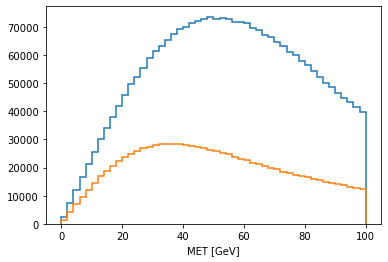

In [8]:
output['MET'].plot1d()

## Miscellaneous

### ServiceX
[ServiceX](https://servicex.readthedocs.io/en/latest/introduction/) is a data delivery package which uses [func_adl](https://pypi.org/project/func-adl/) to fetch data. 

**The coffea-casa facility is built to support ServiceX, though it is currently in experimental stages. This section will be updated as ServiceX implementation becomes more stable.**